In [44]:
import os
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

%matplotlib inline

Create a sample array with data like the train.txt in keras-yolo3 format

In [66]:
train_txt_sample = [
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00008-capture.jpg 37,32,53,87,0 58,30,72,63,0 62,30,90,102,0 14,41,40,110,0 29,36,47,96,0',
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00046-capture.jpg 54,72,102,206,0 81,107,156,339,0 0,90,45,257,0',
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00063-capture.jpg',
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00049-capture.jpg 60,79,114,225,0 21,137,123,396,0 0,108,45,288,0',
]

Define some constants

In [6]:
IMG_WIDTH = 640
IMG_HEIGHT = 480

# Generate the masks

In [67]:
#Get a single sample
annot = train_txt_sample[0]
annot = annot.split(' ')
img_path = annot[0]
print(img_path)

/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00008-capture.jpg


### Show the source image

img shape: (480, 640)


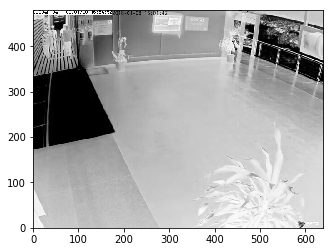

In [68]:
img = mpimg.imread(img_path)
#lets make grayscaled
img = img[:,:,0]
print('img shape:',img.shape)
imgplot = plt.imshow(img, extent=[0, 639, 0, 479],cmap='Greys')

Plot bboxes

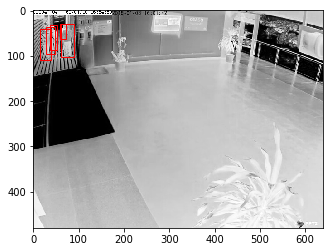

In [72]:
fig,ax = plt.subplots(1)
ax.imshow(img,cmap='Greys')

for bbox in annot[1:]:
    x_min, y_min, x_max, y_max, class_id = list(map(int, bbox.split(',')))
    rect = patches.Rectangle((x_min,y_min),x_max-x_min,y_max-y_min,linewidth=1,edgecolor='r',facecolor='none')

    ax.add_patch(rect)

plt.show()

### Create the masks

Foreground (pedestrian)

mask shape: (480, 640)


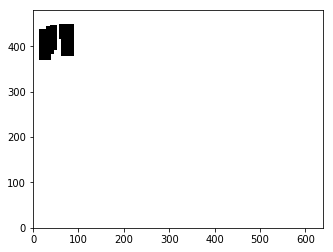

In [70]:
#load the foreground (pedestrians) mask being empty as default (zeros)
fg_mask = np.zeros((IMG_HEIGHT,IMG_WIDTH), dtype=np.uint8)
print('mask shape:',fg_mask.shape)
for bbox in annot[1:]:
    x_min, y_min, x_max, y_max, class_id = list(map(int, bbox.split(',')))
    #we set the rectangles from the bboxes with 1
    fg_mask[y_min:y_max, x_min:x_max] = 1

imgplot = plt.imshow(fg_mask,cmap='binary',extent=[0, 639, 0, 479])

Background

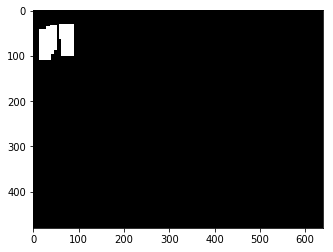

In [71]:
imgplot = plt.imshow(np.invert(fg_mask),cmap='binary')